In [11]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('./Data/data.csv',encoding='unicode_escape')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [14]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [16]:
df_UK = df[df['Country']=='United Kingdom']
df_UK.shape


(495478, 8)

In [17]:
df_UK = df_UK[df_UK['Quantity']>0]
df_UK.shape

(486286, 8)

In [18]:
df_UK.dropna(subset='CustomerID',how='all',inplace=True)
df_UK.shape

(354345, 8)

In [19]:
df_UK = df_UK[df_UK['InvoiceDate']>='2010-12-09']
df_UK.shape

(176137, 8)

In [20]:
df_UK['InvoiceDate'].max()

'9/9/2011 9:52'

In [21]:
# the last purchase happend in our table is 9/9/2011 
import time, warnings
import datetime as dt

reference_datepoint = dt.date(2011,12,9)
print(reference_datepoint)

2011-12-09


In [22]:
df_UK['date']=pd.DatetimeIndex(df_UK['InvoiceDate']).date
df_UK.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01
105336,545220,48194,DOORMAT HEARTS,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/2011 8:30,1.65,14620.0,United Kingdom,2011-03-01
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/2011 8:30,4.95,14620.0,United Kingdom,2011-03-01
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/2011 8:30,3.75,14620.0,United Kingdom,2011-03-01
105340,545220,21485,RETROSPOT HEART HOT WATER BOTTLE,3,3/1/2011 8:30,4.95,14620.0,United Kingdom,2011-03-01
105341,545220,17091J,VANILLA INCENSE IN TIN,6,3/1/2011 8:30,1.25,14620.0,United Kingdom,2011-03-01
105342,545220,84678,CLASSICAL ROSE SMALL VASE,6,3/1/2011 8:30,2.55,14620.0,United Kingdom,2011-03-01
105343,545220,21700,BIG DOUGHNUT FRIDGE MAGNETS,12,3/1/2011 8:30,0.85,14620.0,United Kingdom,2011-03-01
105344,545220,22191,IVORY DINER WALL CLOCK,2,3/1/2011 8:30,8.50,14620.0,United Kingdom,2011-03-01


In [23]:
#group by customers and check last date of purshace
recency_df = df_UK.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12747.0,2011-08-22
1,12748.0,2011-09-30
2,12749.0,2011-08-01
3,12820.0,2011-09-26
4,12821.0,2011-05-09


In [24]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (reference_datepoint - x).days)

In [25]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12747.0,2011-08-22,109
1,12748.0,2011-09-30,70
2,12749.0,2011-08-01,130
3,12820.0,2011-09-26,74
4,12821.0,2011-05-09,214


In [26]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [27]:
recency_df.head()

,CustomerID,Recency
0,12747.0,109
1,12748.0,70
2,12749.0,130
3,12820.0,74
4,12821.0,214


In [28]:
# drop duplicates
df_UK_copy = df_UK
df_UK_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)


#calculate frequency of purchases
frequency_df = df_UK_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12747.0,5
1,12748.0,96
2,12749.0,3
3,12820.0,1
4,12821.0,1


In [31]:
#create column total cost
df_UK['TotalCost'] = df_UK['Quantity'] * df_UK['UnitPrice']
df_UK.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01,15.9
105350,545221,22021,BLUE FELT EASTER EGG BASKET,6,3/1/2011 8:35,1.65,14740.0,United Kingdom,2011-03-01,9.9
105380,545222,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,6,3/1/2011 8:49,2.95,13880.0,United Kingdom,2011-03-01,17.7
105389,545223,22487,WHITE WOOD GARDEN PLANT LADDER,4,3/1/2011 8:58,8.50,16462.0,United Kingdom,2011-03-01,34.0
105390,545224,22664,TOY TIDY DOLLY GIRL DESIGN,5,3/1/2011 9:03,2.10,17068.0,United Kingdom,2011-03-01,10.5
105401,545225,22219,LOVEBIRD HANGING DECORATION WHITE,24,3/1/2011 9:22,0.85,12971.0,United Kingdom,2011-03-01,20.4
105597,545228,22502,PICNIC BASKET WICKER SMALL,16,3/1/2011 9:47,4.95,16078.0,United Kingdom,2011-03-01,79.2
105598,545229,20829,GLITTER HANGING BUTTERFLY STRING,8,3/1/2011 9:52,2.10,16915.0,United Kingdom,2011-03-01,16.8
105607,545231,22993,SET OF 4 PANTRY JELLY MOULDS,12,3/1/2011 10:08,1.25,15194.0,United Kingdom,2011-03-01,15.0
105619,545232,10133,COLOURING PENCILS BROWN TUBE,10,3/1/2011 10:19,0.85,15676.0,United Kingdom,2011-03-01,8.5


In [32]:
monetary_df = df_UK.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12747.0,191.85
1,12748.0,1054.43
2,12749.0,67.00
3,12820.0,15.00
4,12821.0,19.92


In [34]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,109,5,191.85
12748.0,70,96,1054.43
12749.0,130,3,67.00
12820.0,74,1,15.00
12821.0,214,1,19.92


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

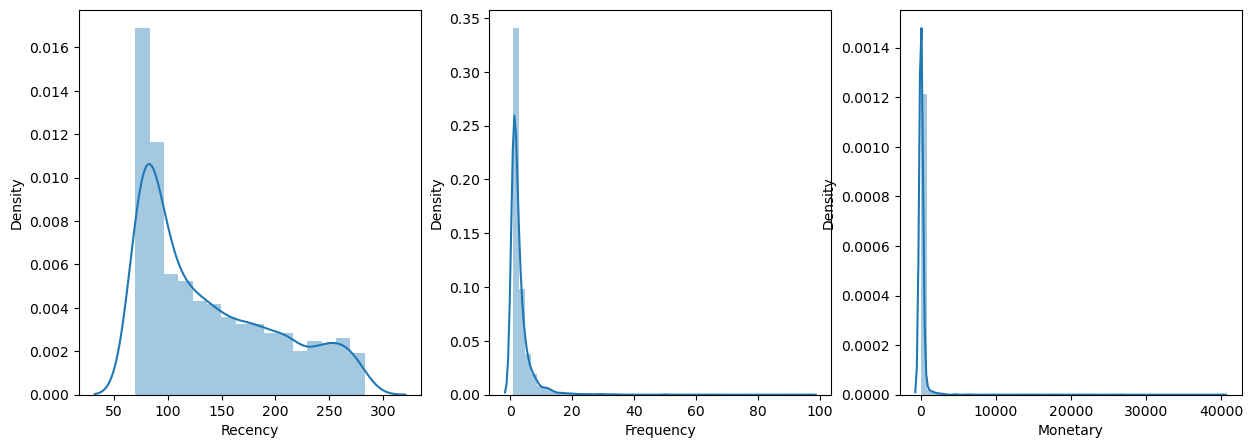

In [41]:
#ve phan phoi du lieu de kiem tra
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.distplot(rfm_df['Recency'],ax=ax[0])
sns.distplot(rfm_df['Frequency'],ax=ax[1])
sns.distplot(rfm_df['Monetary'],ax=ax[2])
plt.show()

In [43]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2,2, figsize=(5,5))
    sns.distplot(rfm_df[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(rfm_df[x].skew().round(2))
    print(np.log(rfm_df[x]).skew().round(2))
    print(np.sqrt(rfm_df[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_df[x])[0]).skew().round(2))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

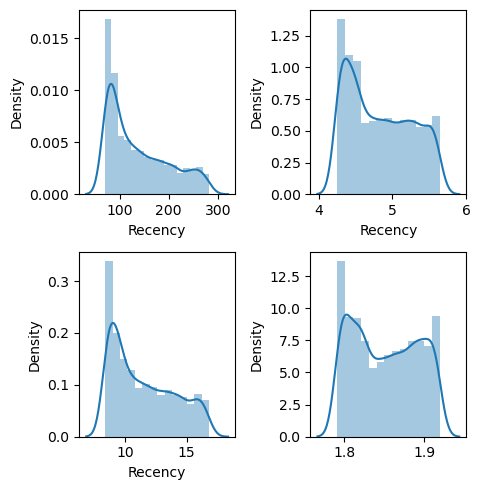

0.75
0.3
0.52
0.1


In [44]:
analyze_skewness('Recency')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

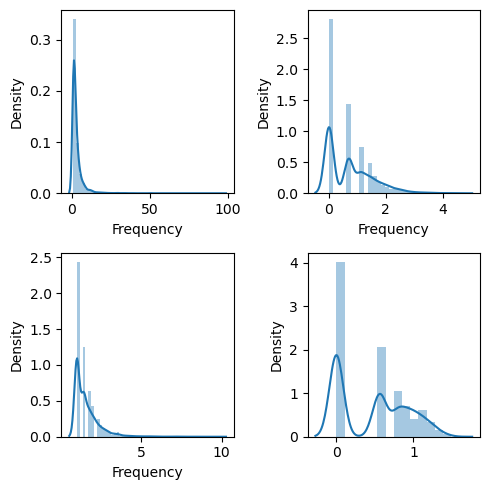

7.83
0.99
2.72
0.23


In [45]:
analyze_skewness('Frequency')

In [47]:
# transforming each colum in RFM 
rfm_df_t = pd.DataFrame()
rfm_df_t['Recency'] = stats.boxcox(rfm_df['Recency'])[0]
rfm_df_t['Frequency'] = stats.boxcox(rfm_df['Frequency'])[0]
rfm_df_t['Monetary'] = pd.Series(np.cbrt(rfm_df['Monetary'])).values
rfm_df_t.head(10)

,Recency,Frequency,Monetary
0,1.841460,1.009077,5.767496
1,1.791374,1.490922,10.178238
2,1.858564,0.791489,4.061548
3,1.798268,0.000000,2.466212
4,1.899698,0.000000,2.710794
5,1.791374,0.560992,3.134610
6,1.798268,0.791489,10.696962
7,1.793152,0.560992,3.341204
8,1.831478,0.791489,4.200227
9,1.822344,1.009077,11.589447


In [48]:
#Tien hanh scale du lieu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_df_t)

rfm_df_t = scaler.transform(rfm_df_t)
pd.DataFrame(rfm_df_t).head()

,0,1,2
0,-0.246016,1.210042,0.799096
1,-1.497098,2.290173,2.666337
2,0.181238,0.722284,0.076901
3,-1.324881,-1.051961,-0.598468
4,1.208713,-1.051961,-0.494927


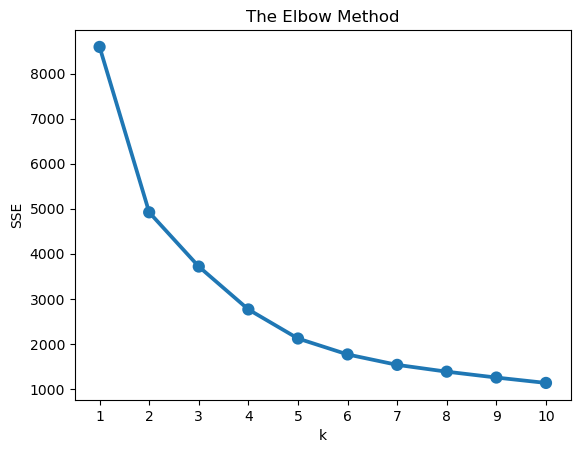

In [49]:
# Chon so cum bang Elbow
from sklearn.cluster import KMeans

sse={}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_df_t)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y= list(sse.values()))
plt.show()

In [50]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_df_t)

KMeans(n_clusters=3, random_state=42)

In [53]:
rfm_df['Cluster']= model.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747.0,109,5,191.85,1
12748.0,70,96,1054.43,1
12749.0,130,3,67.00,0
12820.0,74,1,15.00,0
12821.0,214,1,19.92,2


In [55]:
rfm_df.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,96.53,2.02,38.26
1,96.40,7.34,574.67
2,202.52,1.29,39.60
